In [147]:
import pandas as pd
import math
import random as rd
import matplotlib.pyplot as plt
import numpy as np


In [153]:



clientes = int(input());
tempo_medio_entre_chegadas = float(input());
tempo_atendimeno =  float(input());

l = 1 / tempo_medio_entre_chegadas;
u = 1 / tempo_atendimeno;
p = l/u;

tabel = pd.DataFrame({'Dados':[clientes , tempo_medio_entre_chegadas , tempo_atendimeno , l , u , p]})

tabel.index = ['Nº de Clientes' , 'Tempo médio entre chegadas /minuto', 'Tempo de atendimento / min' , 'Taxa de chegada  (λ)' , 'Nível de Serviço (μ)' , 'ρ']




print(tabel)


                                     Dados
Nº de Clientes                      5000.0
Tempo médio entre chegadas /minuto     1.0
Tempo de atendimento / min             0.5
Taxa de chegada  (λ)                   1.0
Nível de Serviço (μ)                   2.0
ρ                                      0.5


In [154]:
def generate_simulation(dados):
    
    ## ri = intervalo de tempo entre chegadas
    ## si = tempo de atendimento(duração)
    ## ai = instante da chegada 
    ## bi = inicio do atendimento
    ## ei = fim de atendimento 
    ## wi = tempo de espera na fila
    ## ui = tempo total no sistema
    ## oi = ociosidade do servidor simulado
    ## wq = tempo médio de fila simulado
    ri =0
    si =0
    ai =0
    bi =0 
    ei =0 
    wi =0 
    ui =0 
    oi =0
    wq =0
    m= 0
    dados.loc[0] = [0,0,0,0,0,0,0,0,0,0]

    for i in range(1,clientes):
    
    
    
       if(i > 0):
       
        ln_ri = (math.log (1-(rd.uniform(0,l)/l))) * (-1)
        
        ln_si = (math.log (1-(rd.uniform(0,u)/u))) * (-1)
        
        ri = ln_ri/l
        
        si = ln_si/u
     
       else:
        
         ri =0
         si =0
    
       ai = ri + ai
       
       bi = max(ai,ei)
       
       oi = bi - ei
       
       ei = bi + si
       
       wi = bi-ai
       
       ui = ei - bi
       
       wq +=wi
  
       if(i>0):
      
         m = wq / i
                
       dados.loc[i] = [i,ri,si,ai,bi,ei,wi,ui,oi,m]
    
    
    

In [155]:
def generate_frequency_plots(dados, wq_teorico):
    
    
   
    
    
    dados_aux_ri = pd.DataFrame(dados["Intervalo de tempo entre chegadas"])
    dados_aux_si = pd.DataFrame(dados["Tempo de atendimento(duração)"])
    dados_aux_wi = pd.DataFrame(dados["Tempo de espera na fila"])
    dados_aux_ui = pd.DataFrame(dados["Tempo Total no Sistema"])
    dados_aux_oi = pd.DataFrame(dados["Ociosidade Servidor Simulado"])
    dados_aux_wq = pd.DataFrame(dados["Tempo médio da fila simulado"])
    
    
    
    
    intervalos = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11.0, 11.5, 12, 12.5, 13]

    label_chegada = ['0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0', '4.0-4.5', '4.5-5.5', '5.5-6.0', '6.0-6.5', '6.5-7.0', '7.0-7.5', '7.5-8.0', '8.0-8.5', '8.5-9.0', '9.0-9.5', '9.5-10.0', '10.0-10.5', '10.5-11.0', '11.0-11.5', '11.5-12.0', '12.0-12.5', '12.5-13.0']

    
    dados_aux_ri['Intervalos'] = pd.cut(dados_aux_ri["Intervalo de tempo entre chegadas"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_si['Intervalos'] = pd.cut(dados_aux_si["Tempo de atendimento(duração)"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_wi['Intervalos'] = pd.cut(dados_aux_wi["Tempo de espera na fila"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_ui['Intervalos'] = pd.cut(dados_aux_ui["Tempo Total no Sistema"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_oi['Intervalos'] = pd.cut(dados_aux_oi["Ociosidade Servidor Simulado"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_wq['Intervalos'] = pd.cut(dados_aux_wq["Tempo médio da fila simulado"],bins=intervalos,labels=label_chegada, right=False)
    
    freq_ri = dados_aux_ri['Intervalos'].value_counts().sort_index()
    freq_si = dados_aux_si['Intervalos'].value_counts().sort_index()
    freq_wi = dados_aux_wi['Intervalos'].value_counts().sort_index()
    freq_ui = dados_aux_ui['Intervalos'].value_counts().sort_index()
    freq_oi = dados_aux_oi['Intervalos'].value_counts().sort_index()
    freq_wq = dados_aux_wq['Intervalos'].value_counts().sort_index()
    
    
    plt.figure(figsize=(10, 10))
    freq_ri.plot(kind='bar', title='Tempo entra chegadas',color = 'blue')
    plt.xlabel('Intervalos de tempo de entra chegadas')
    plt.ylabel('Frequência')
    plt.show()  

    plt.figure(figsize=(10, 10))
    freq_si.plot(kind='bar', title='Tempo de atendimento',color = 'green')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show() 

    plt.figure(figsize=(10, 10))
    freq_wi.plot(kind='bar', title='Tempo de espera na fila',color = 'red')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show()  

    plt.figure(figsize=(10, 10))
    freq_ui.plot(kind='bar', title='Tempo total do sistema', color = 'purple')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show()  

    plt.figure(figsize=(10, 10))
    freq_oi.plot(kind='bar', title='Ociosidade Servidor Simulado', color = 'orange')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show()  

     
    
    plt.figure(figsize=(10, 10))
    
    x = np.arange(1,len(dados_aux_wq['Tempo médio da fila simulado'])+1)
    
    wq_simulado =  dados['Tempo médio da fila simulado']
    
    wq_teorico = np.full(len(wq_simulado), wq_teorico)
    
    
    plt.plot(x, wq_simulado, label='Tempo médio da fila' , color = 'blue', linewidth=2)
    plt.plot(x,wq_teorico, label = 'Tempo médio da fila Teórico', color='red', linestyle='--',linewidth=2)
    plt.title("Tempo médio da fila simulado x Tempo médio da fila teórico", fontsize = 12 , fontweight = 'bold' , pad=10)
    plt.xlabel('Numero de observações')
    plt.ylabel('Tempo médio de fila')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend()
    plt.show()
    
    
    
    


        
        
                
        
    
    
    

In [156]:
dados_simulacao_1 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_2 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_3 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_4 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_5 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])

In [ ]:
generate_simulation(dados_simulacao_1)
dados_simulacao_1

In [ ]:
generate_simulation(dados_simulacao_2)
dados_simulacao_2

In [ ]:
generate_simulation(dados_simulacao_3)
dados_simulacao_3

In [ ]:
generate_simulation(dados_simulacao_4)
dados_simulacao_4

In [ ]:
generate_simulation(dados_simulacao_5)
dados_simulacao_5


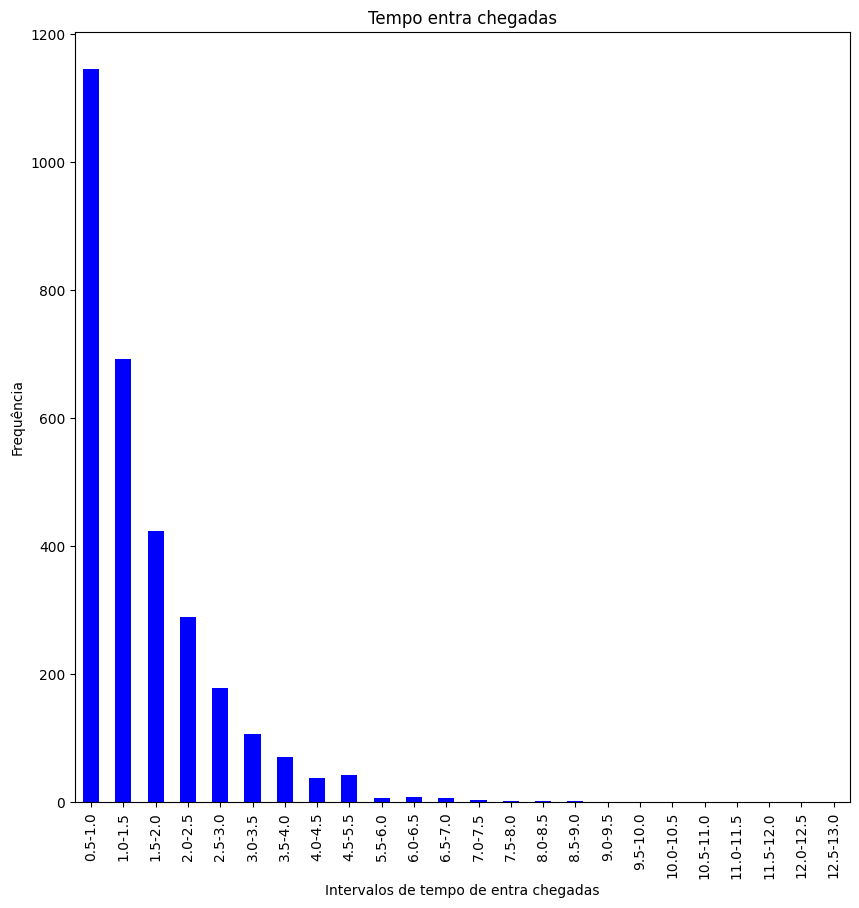

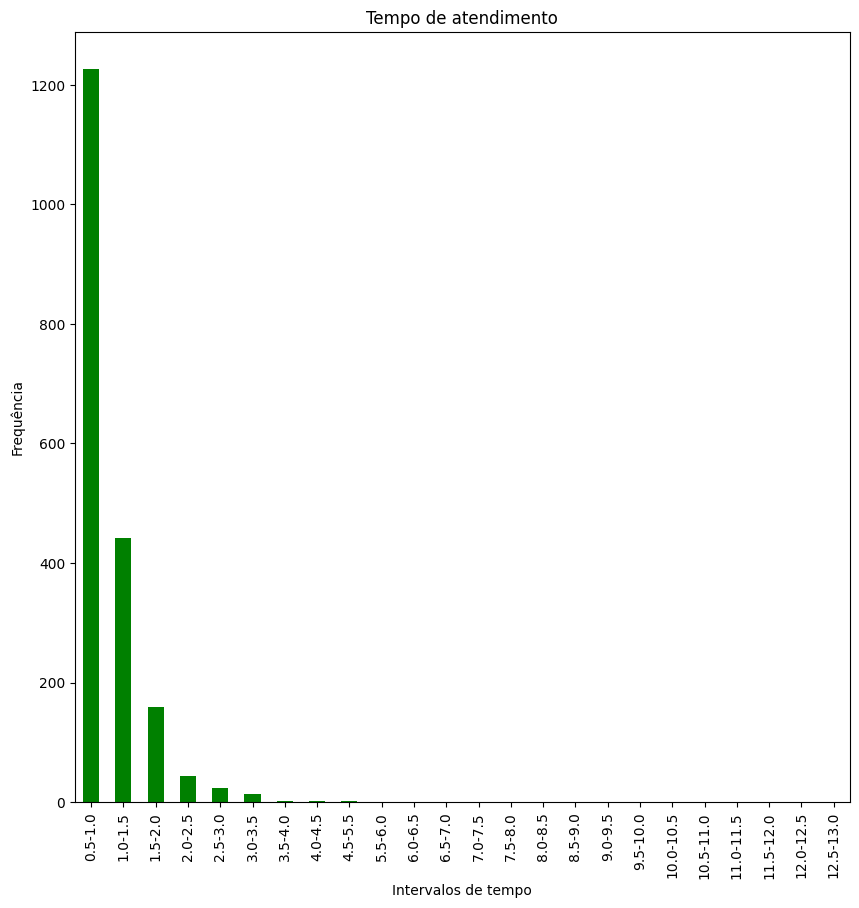

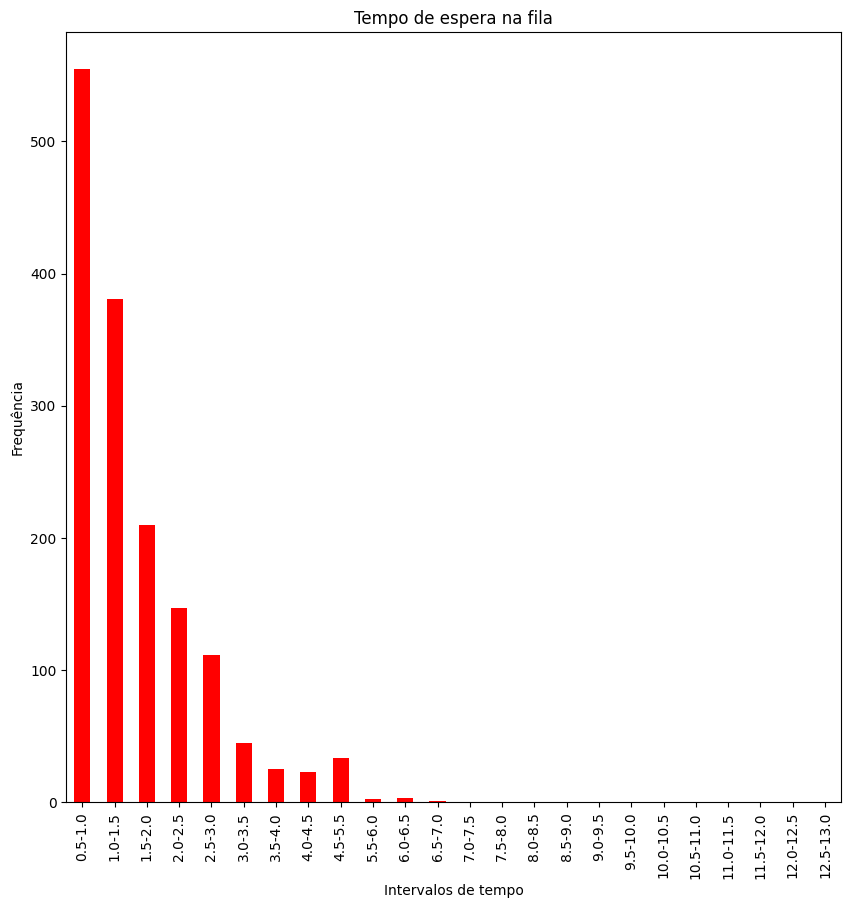

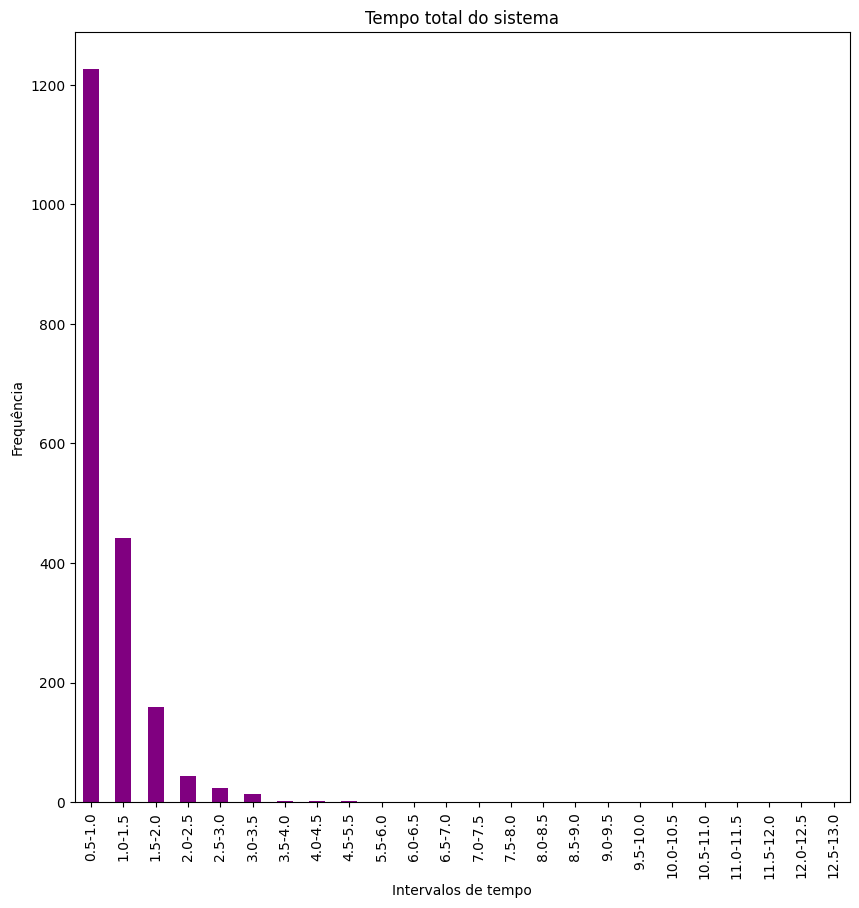

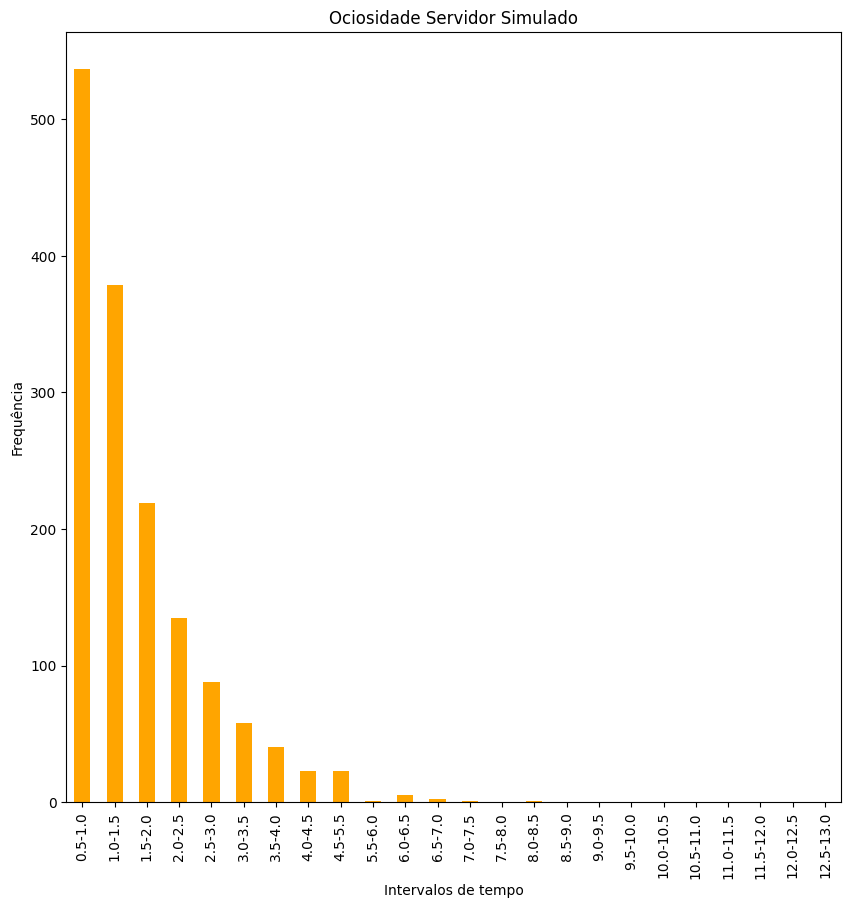

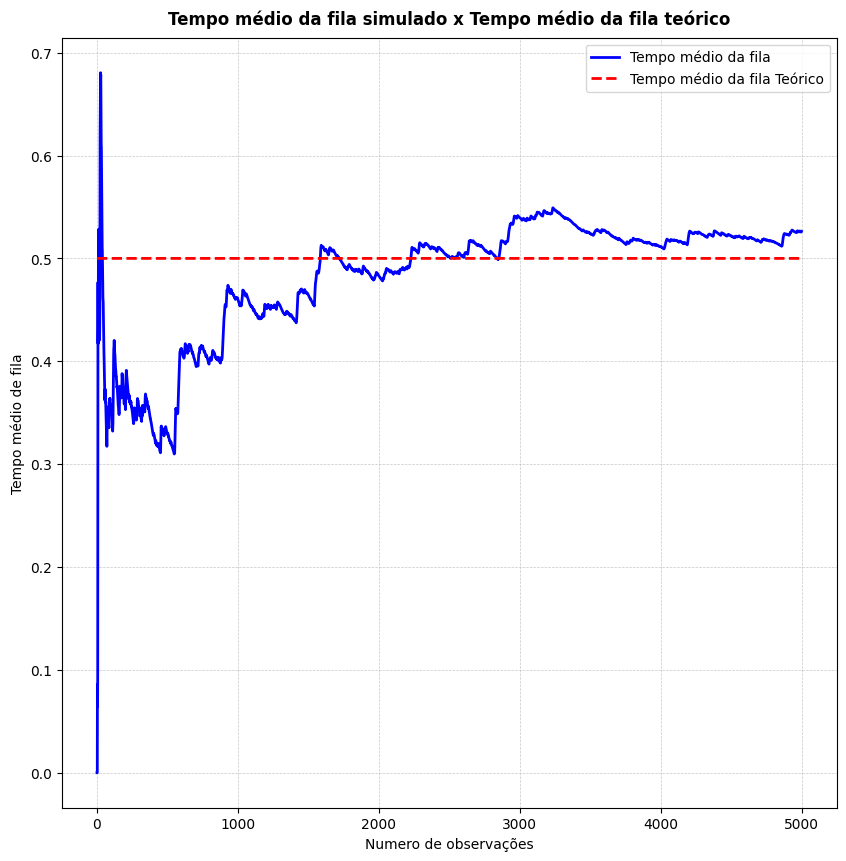

In [157]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_1,wq)

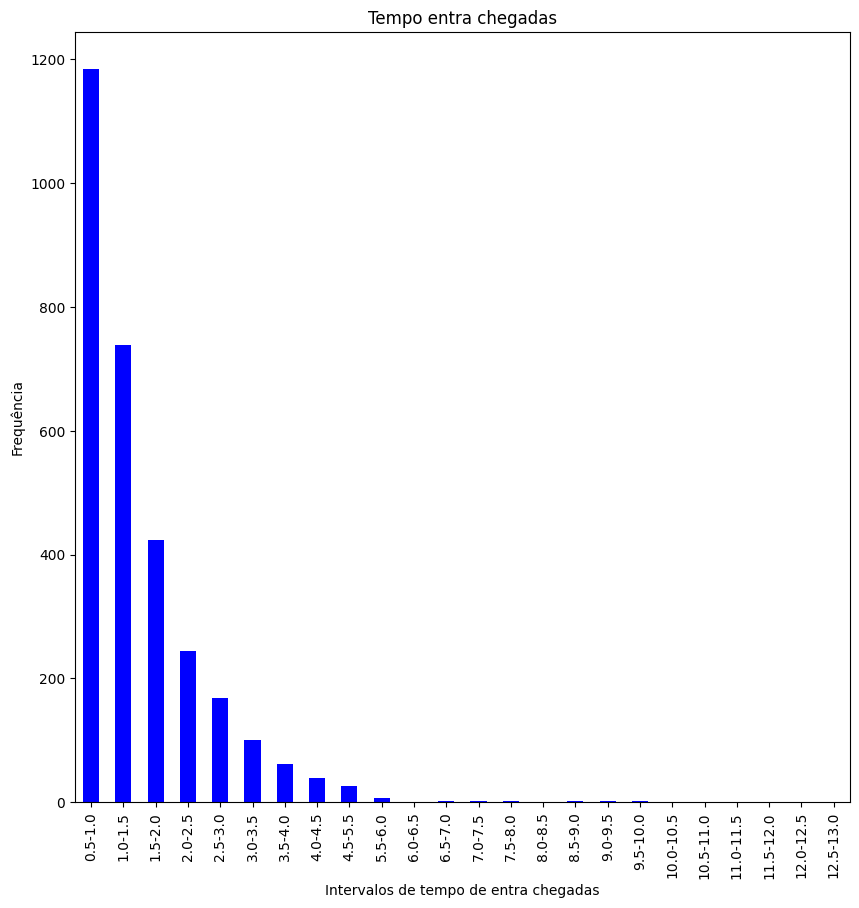

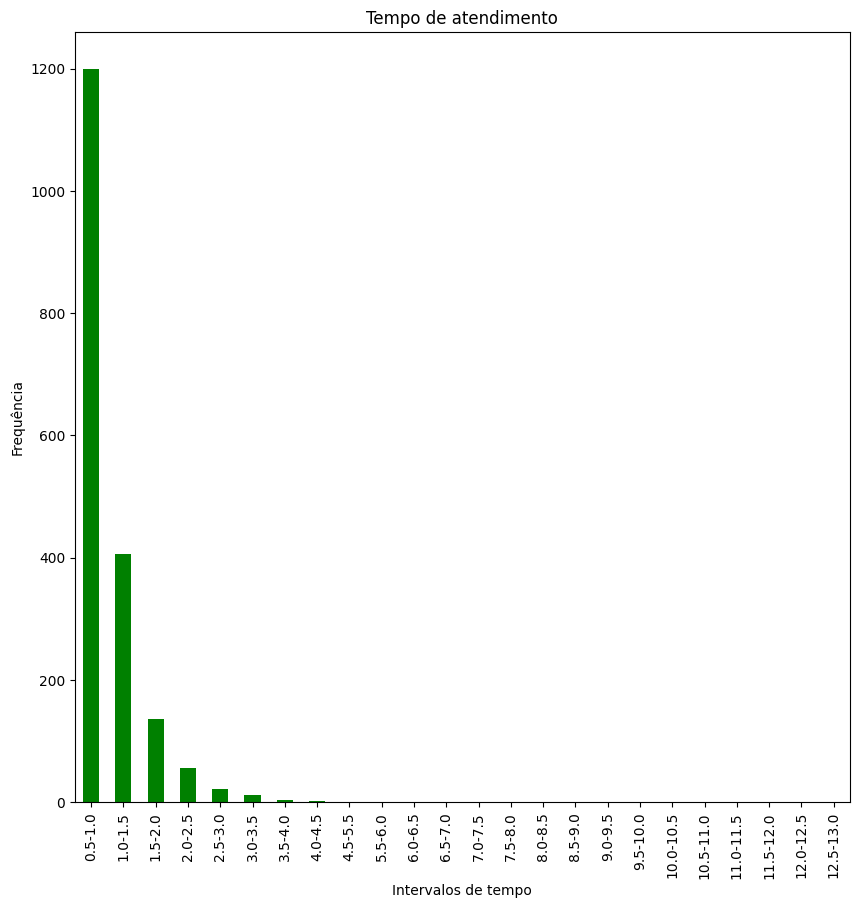

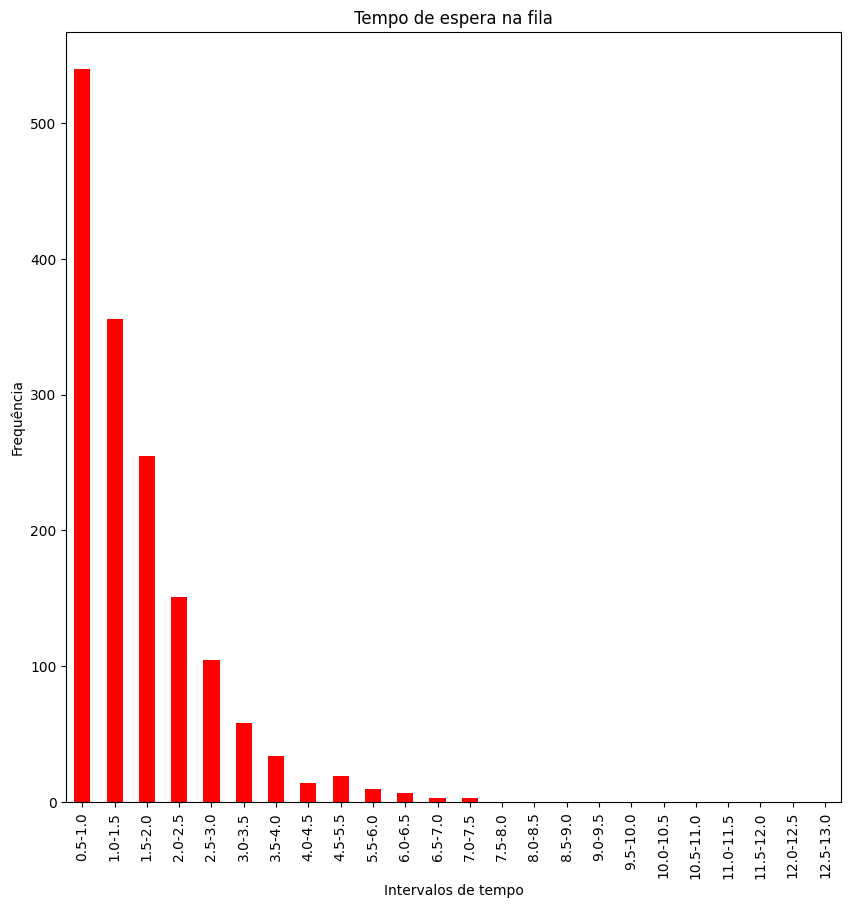

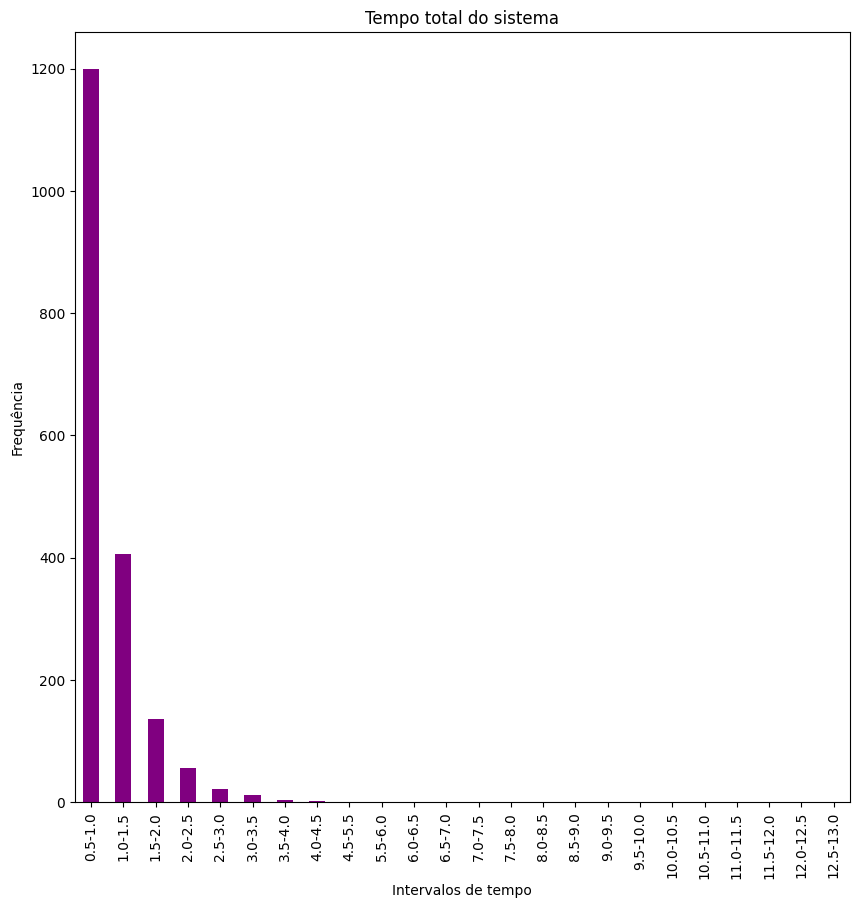

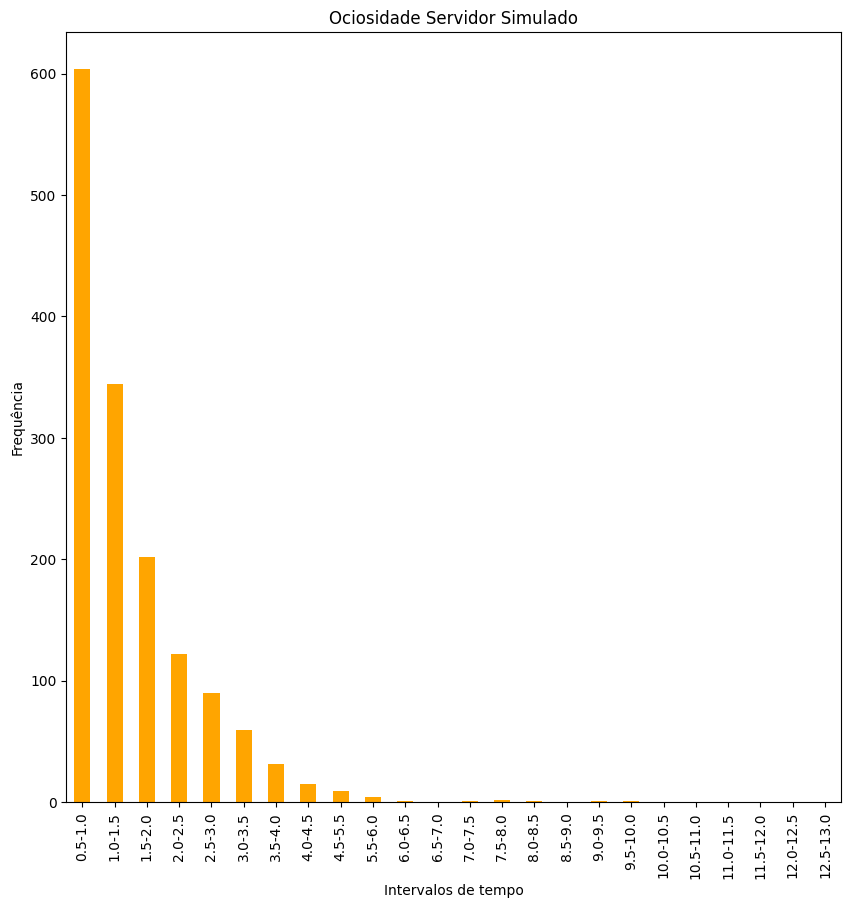

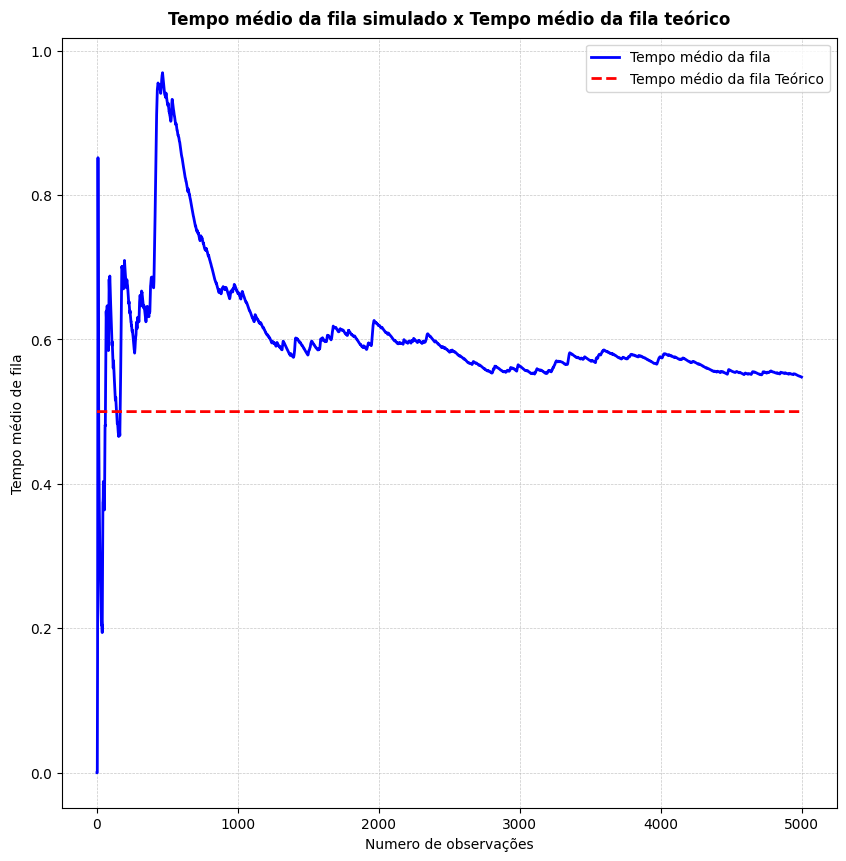

In [159]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_2,wq)

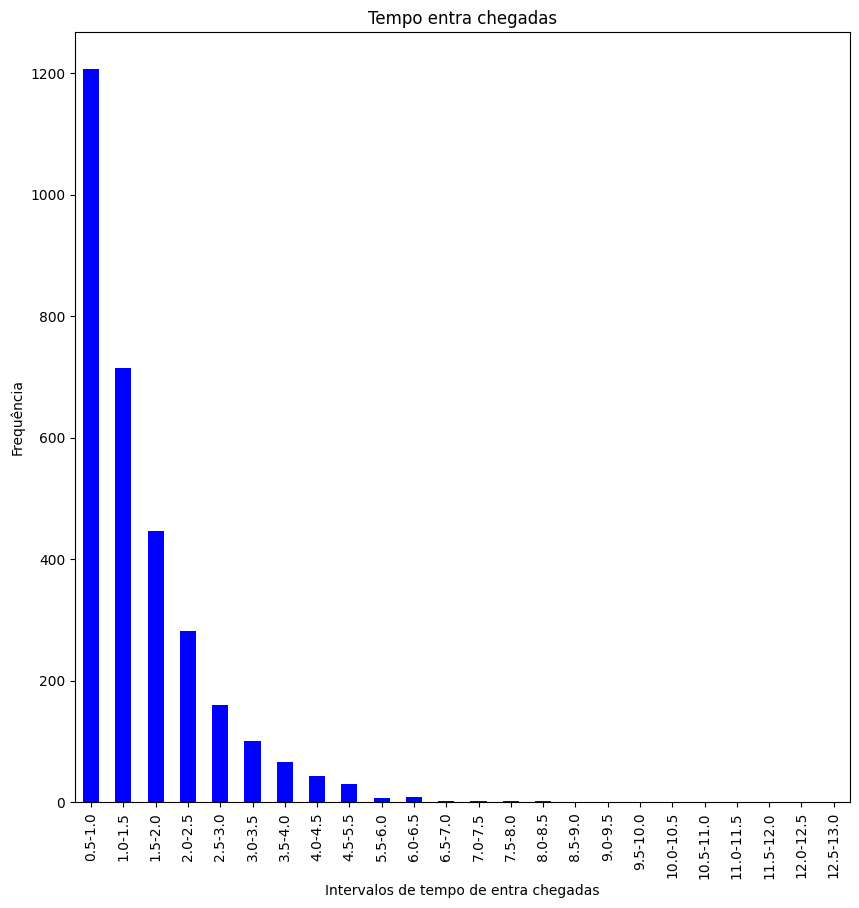

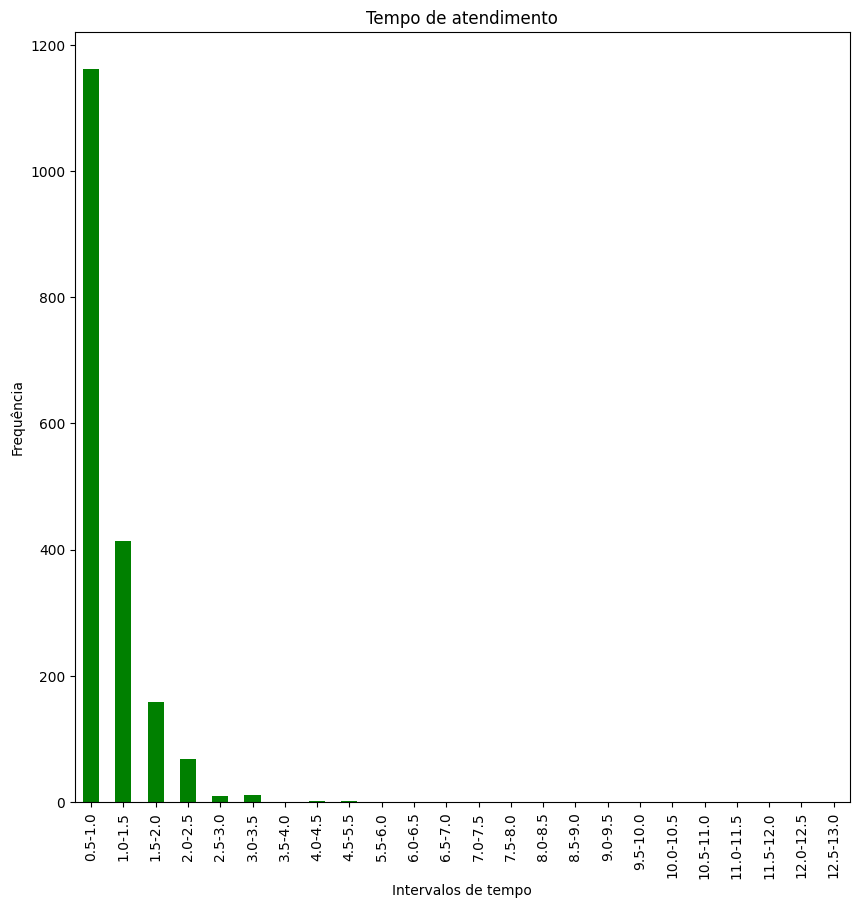

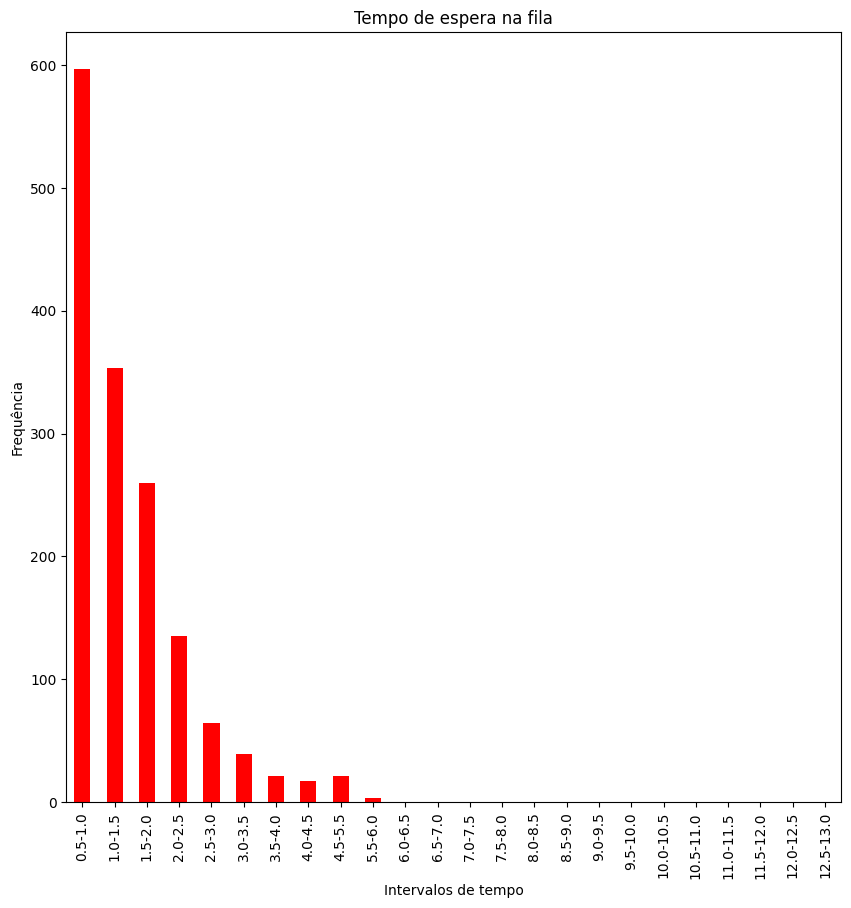

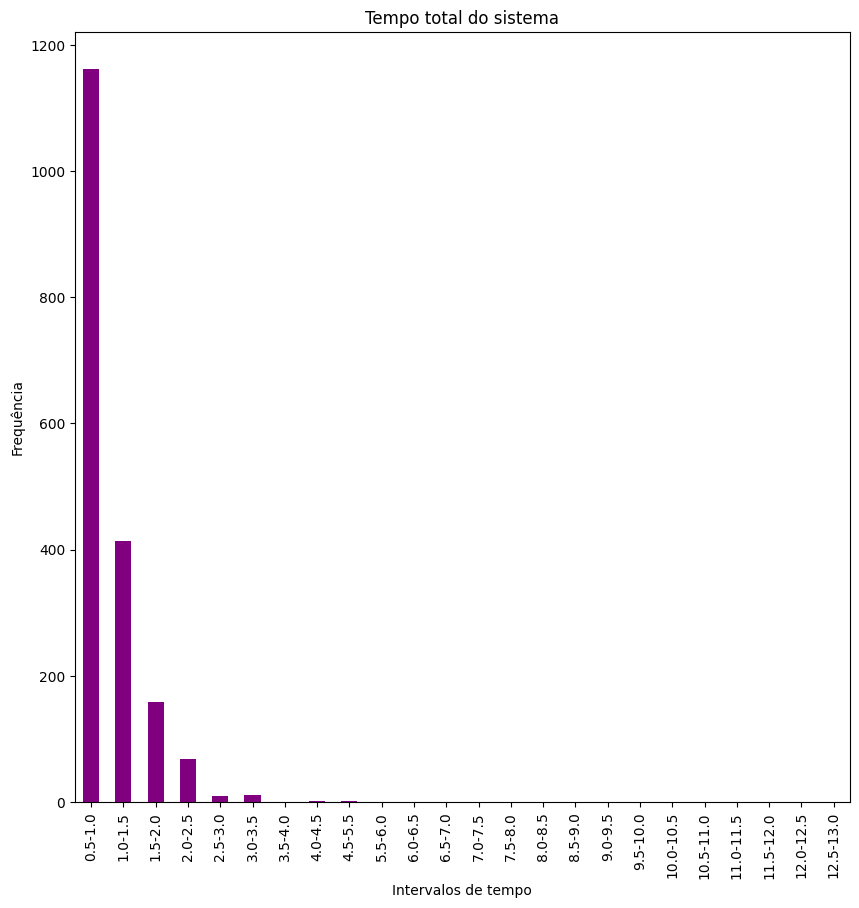

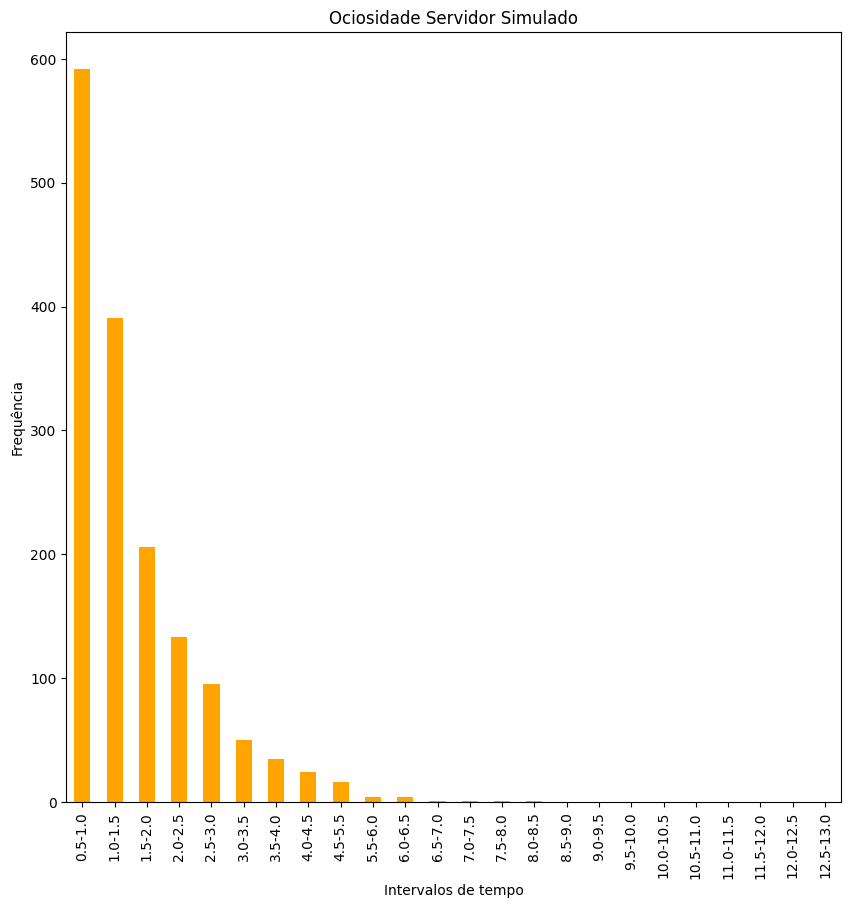

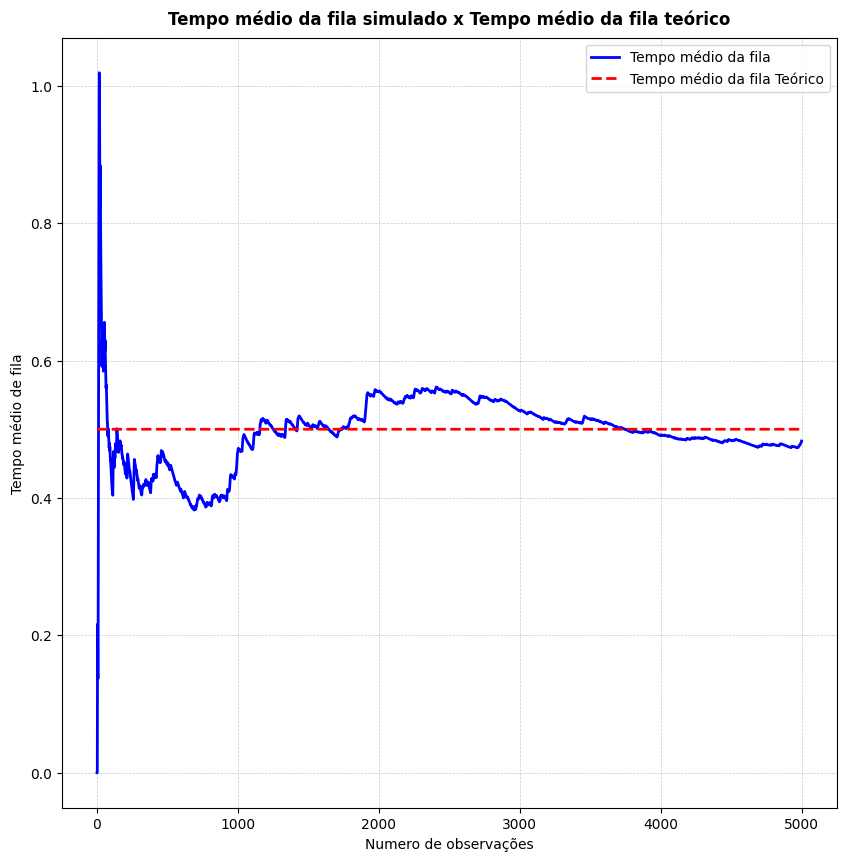

In [161]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_3,wq)


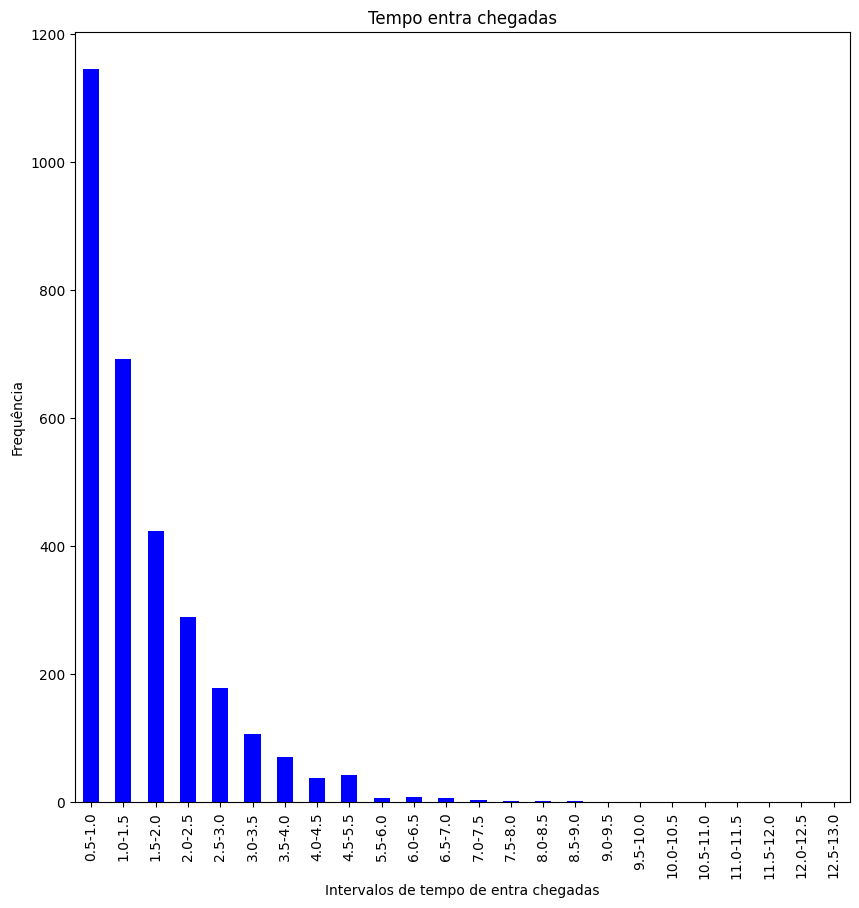

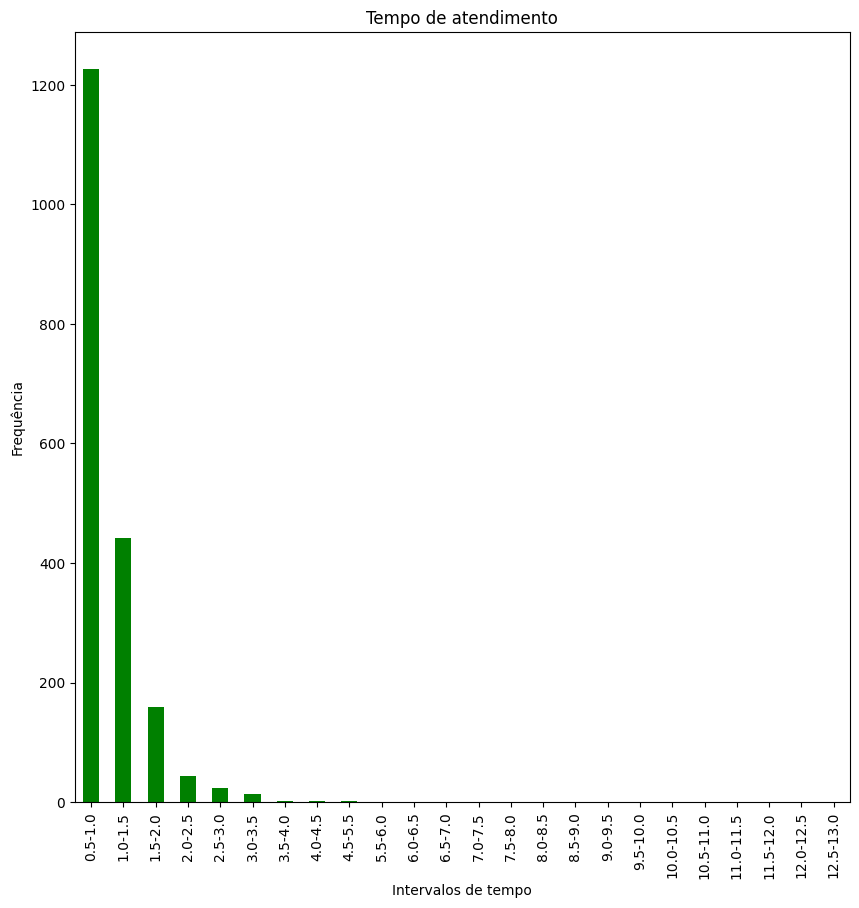

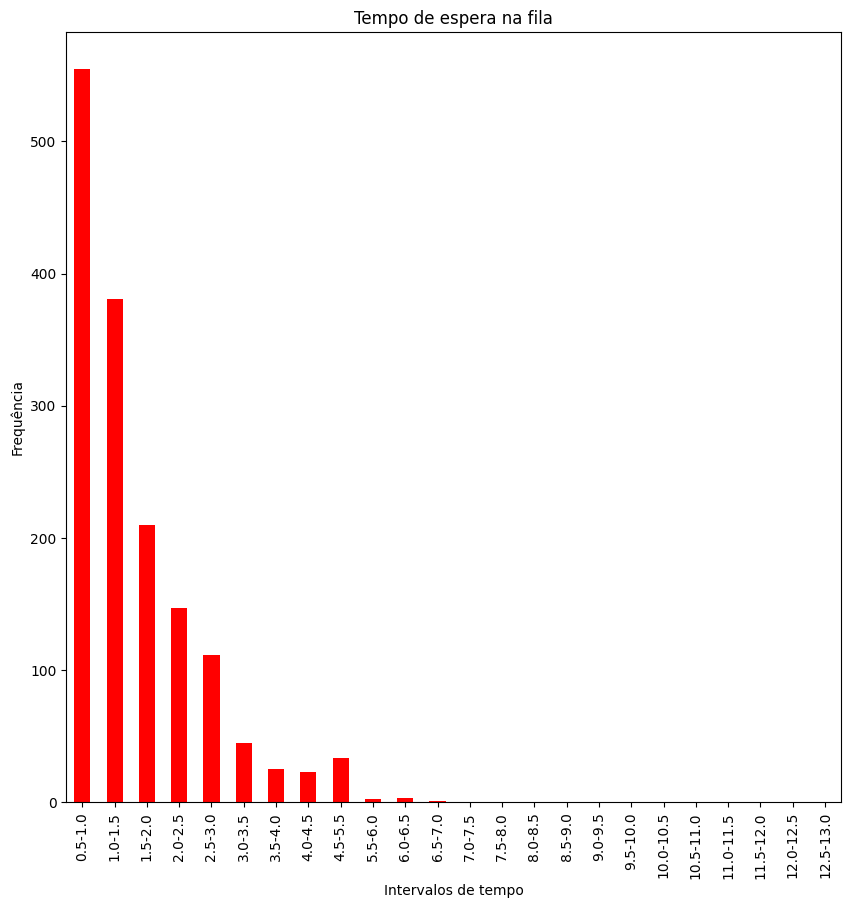

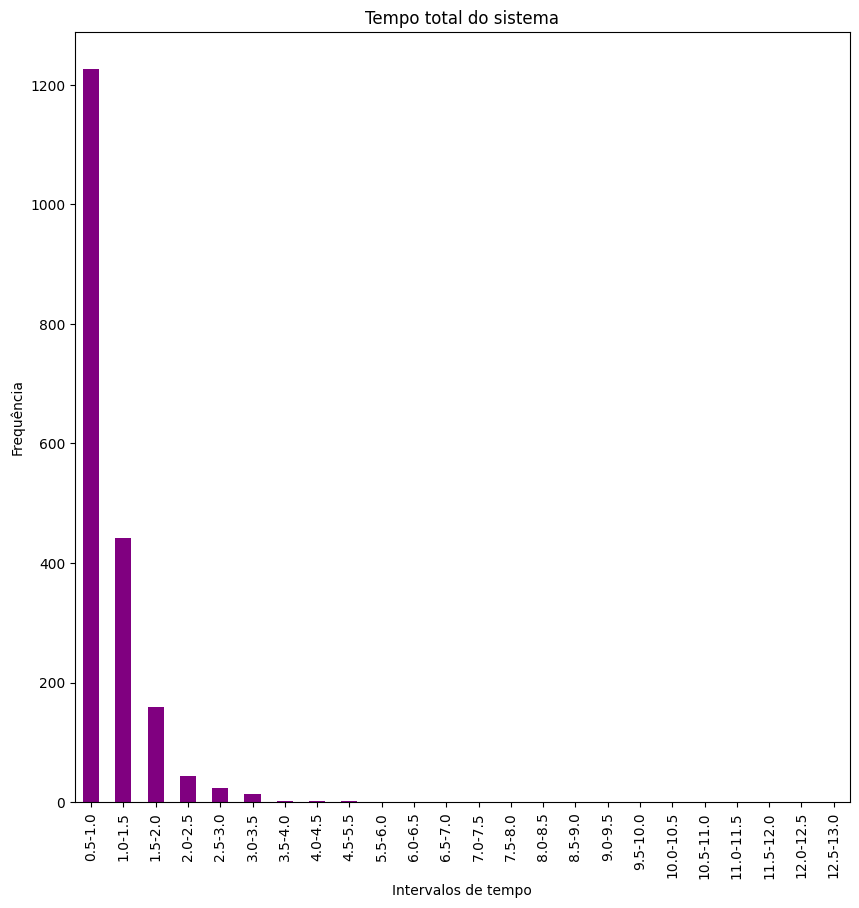

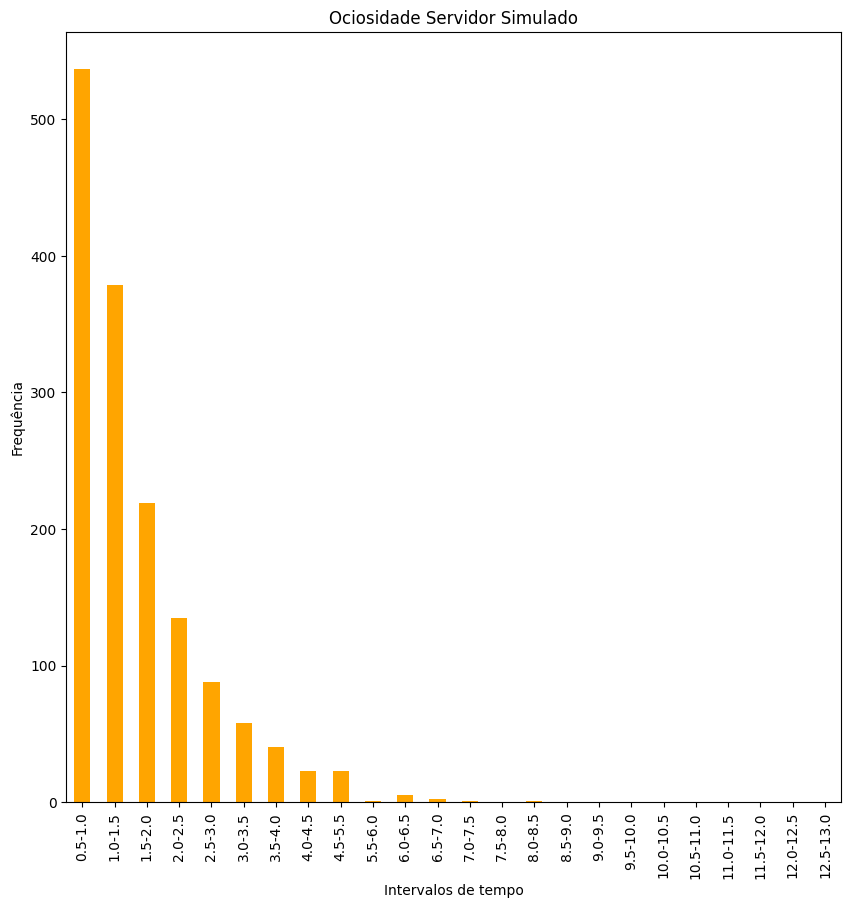

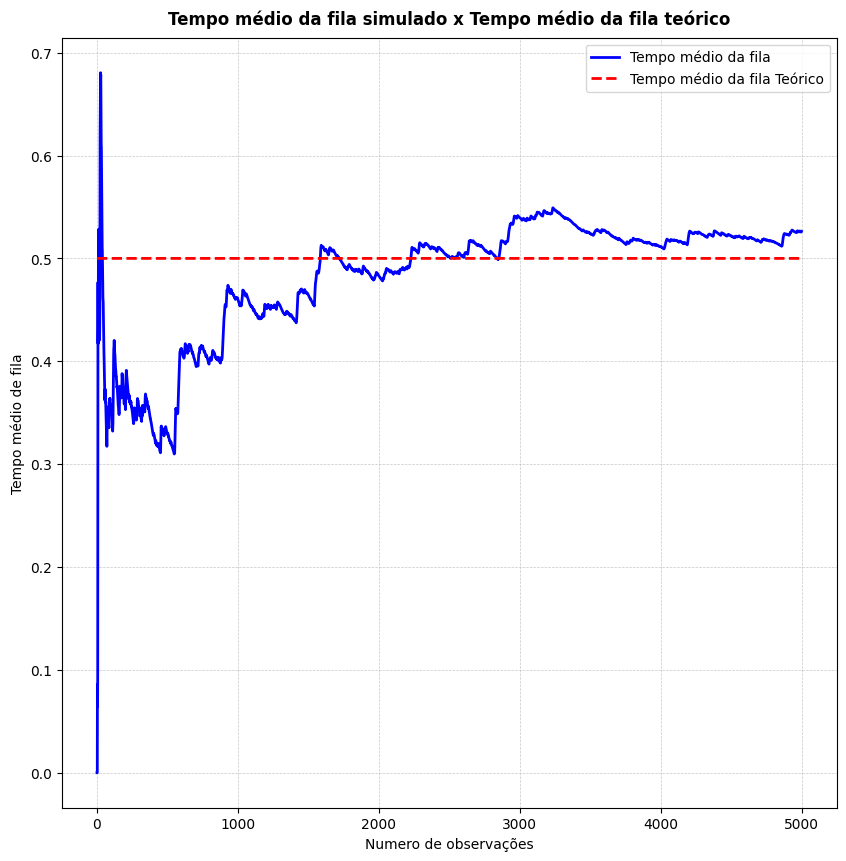

In [162]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_4,wq)


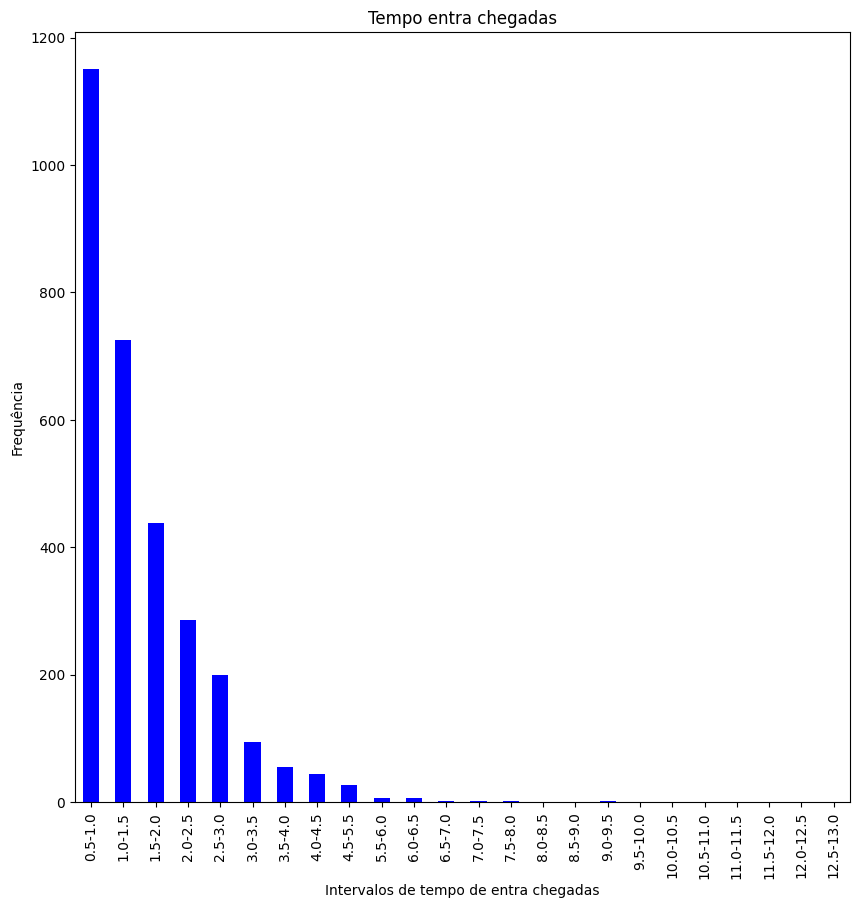

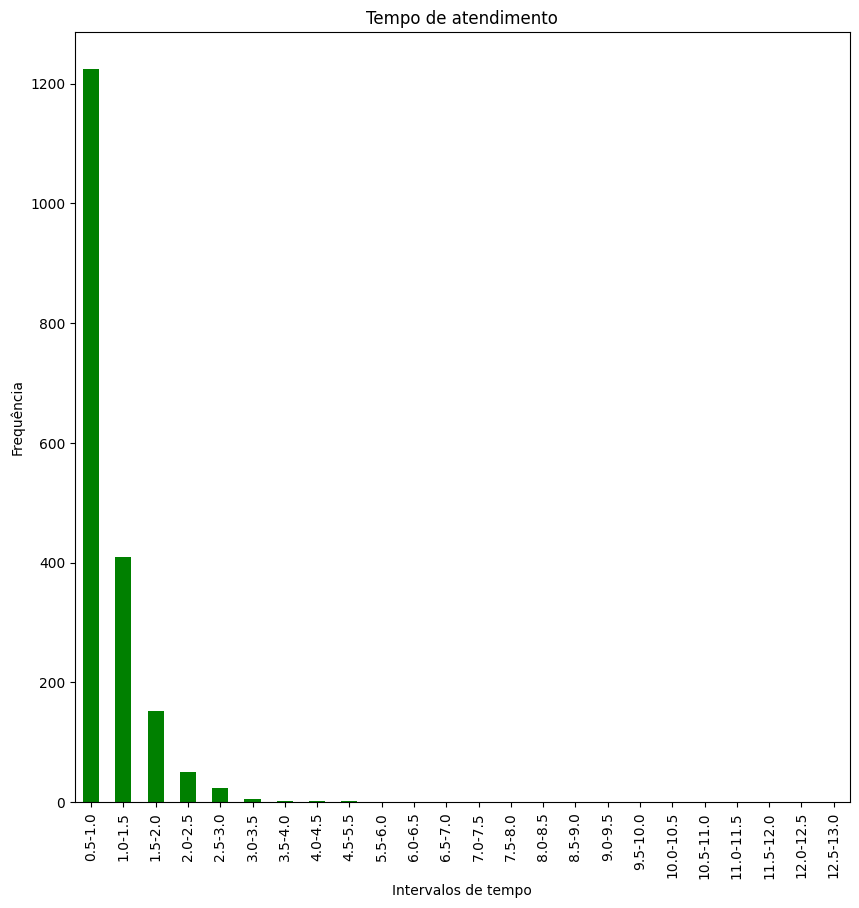

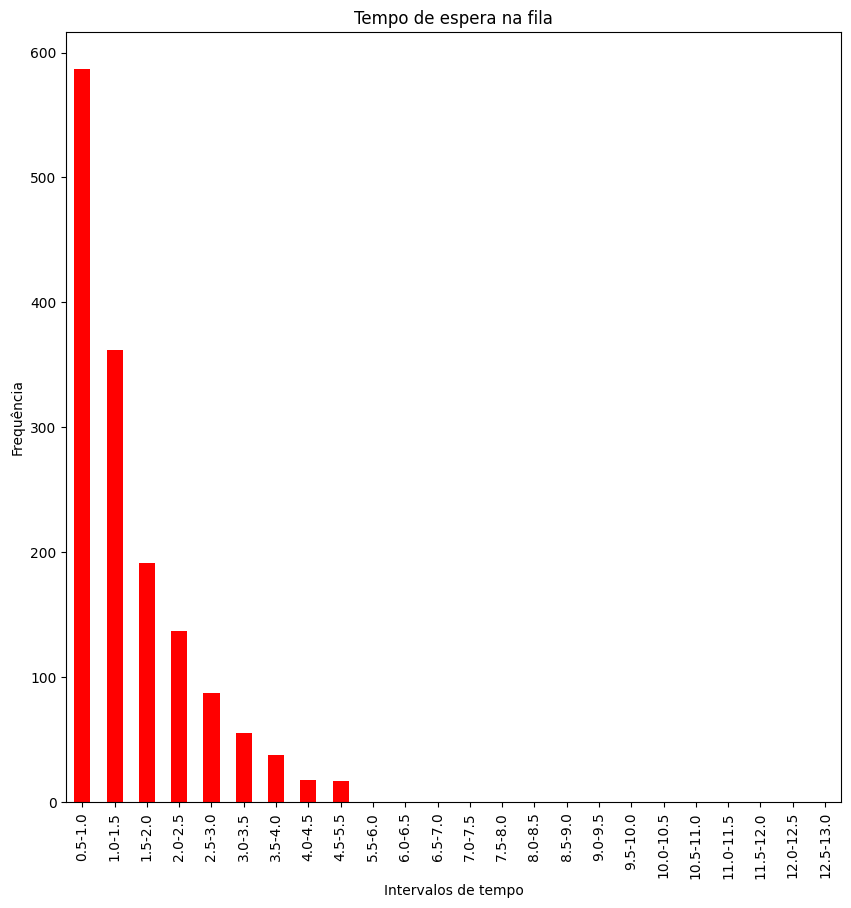

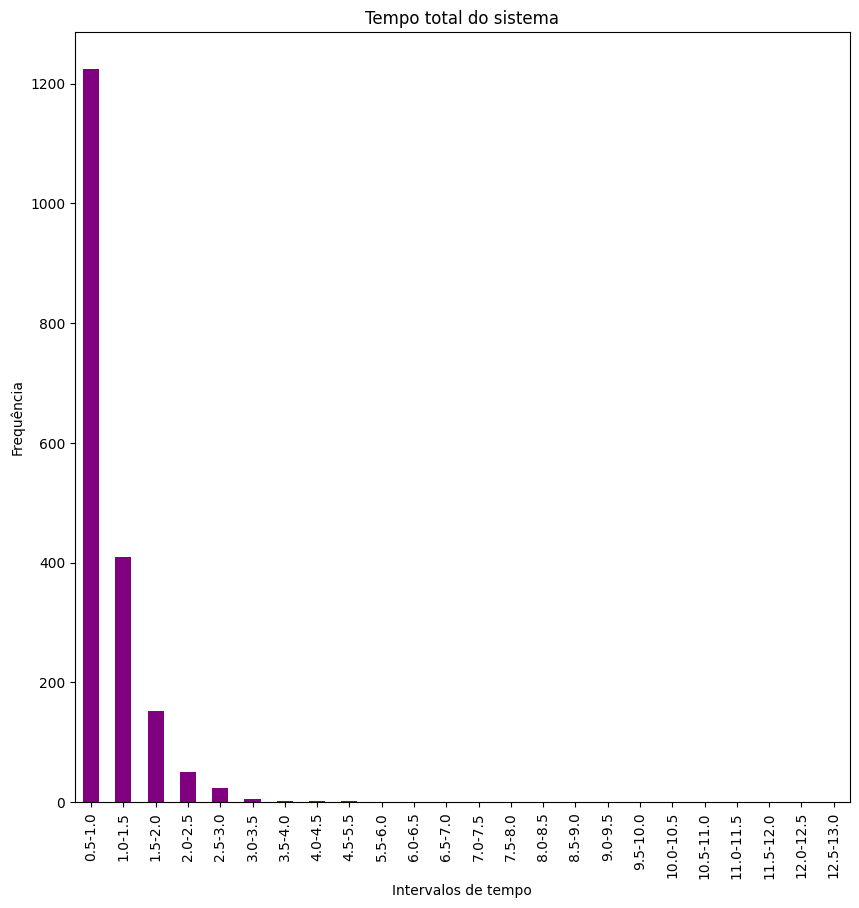

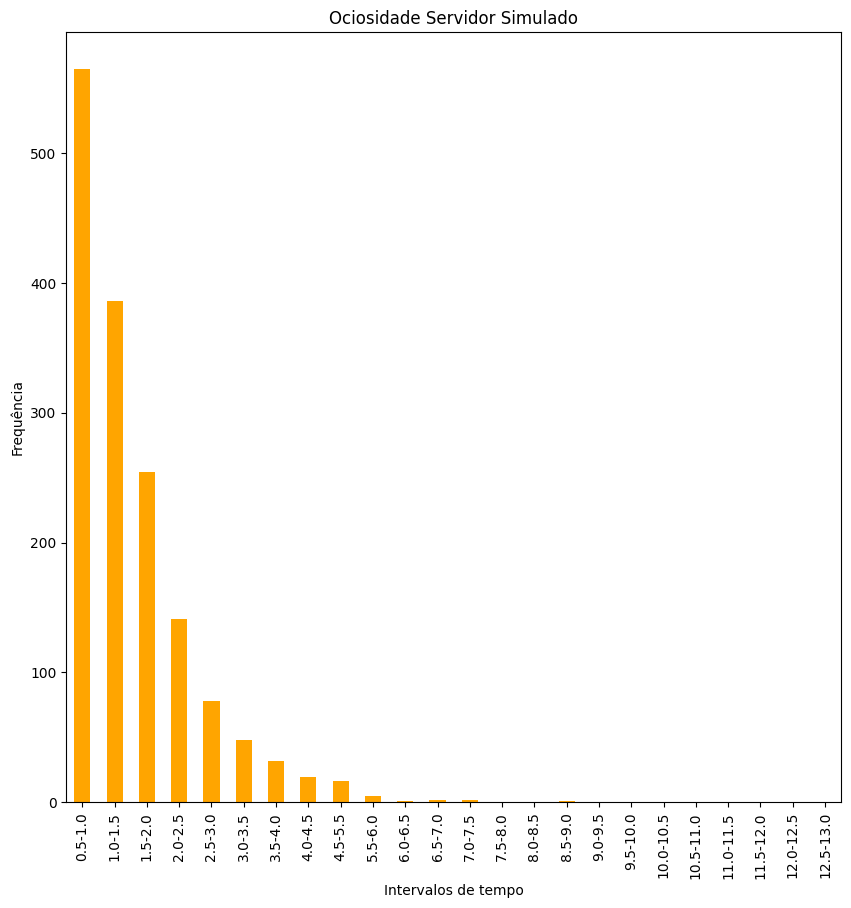

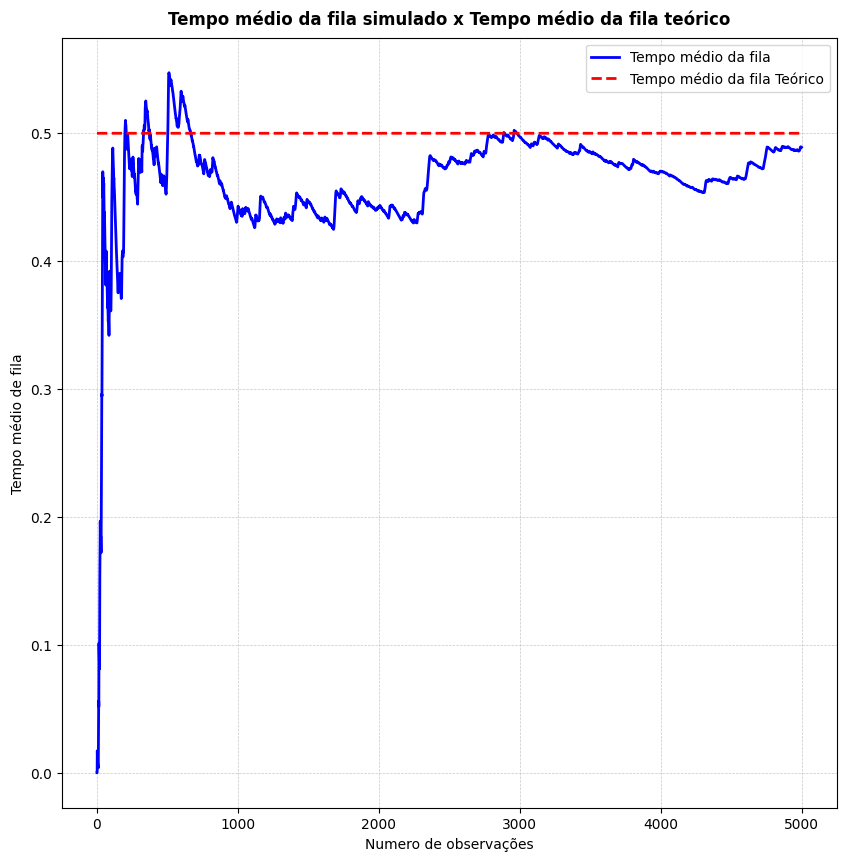

In [163]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_5,wq)